In [1]:

#!/usr/bin/python3
# -*- coding: utf-8 -*-
from __future__ import division, print_function, unicode_literals
import tensorflow as tf
from time import time
from keras.utils import np_utils#one hot
import os
from skimage import data
from skimage import transform
import skimage
import numpy as np

# Download the dataset


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                  if os.path.isdir(os.path.join(data_directory,d))]
    labels=[]
    images=[]
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)
                     if f.endswith('.jpg')]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels




ROOT_PATH = '/host//Can/dpr/'
train_data_directory = os.path.join(ROOT_PATH, "outPut3/train")
validation_data_directory = os.path.join(ROOT_PATH, "outPut3/val")
test_data_directory = os.path.join(ROOT_PATH, "outPut3/test")
train_images,train_labels = load_data(train_data_directory)
test_images,test_labels = load_data(test_data_directory)
validation_images,validation_labels = load_data(validation_data_directory)







/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
test_labels


['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'V',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 'G',
 'G',
 'G',
 'G',
 'G',
 'G',
 'G',
 'G'

In [3]:

#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

#train_labels = np_utils.to_categorical(train_labels,num_classes = None)
#test_labels = np_utils.to_categorical(test_labels,num_classes = None)
trL,teL,valL=array(train_labels),array(test_labels),array(validation_labels)
label_encoder = LabelEncoder()


In [4]:
integer_encoded_trL = label_encoder.fit_transform(trL)
integer_encoded_teL = label_encoder.fit_transform(teL)
integer_encoded_valL = label_encoder.fit_transform(valL)

In [5]:
trainLabels = np_utils.to_categorical(integer_encoded_trL,num_classes = 32)
testLabels = np_utils.to_categorical(integer_encoded_teL,num_classes = 32)
validationLabels = np_utils.to_categorical(integer_encoded_valL,num_classes = 32)

In [6]:
########convert rgb images into black and white
from skimage.color import rgb2gray

trainImages = rgb2gray(np.array(train_images))
testImages = rgb2gray(np.array(test_images))
valImages = rgb2gray(np.array(validation_images))
train_flat_images = np.reshape(trainImages,(len(trainImages),16*8))
test_flat_images = np.reshape(testImages,(len(testImages),16*8))
val_flat_images = np.reshape(valImages,(len(valImages),16*8))


In [7]:
valImages.shape

(411, 16, 8)

In [8]:
train_flat_images[0].shape

(128,)

In [9]:
integer_encoded_trL[0]

25

In [10]:
validationLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [11]:
print('Size of:')
print('- Training-set:\t\t{}'.format(len(trainLabels)))
print('- Test-set:\t\t{}'.format(len(testLabels)))
print('- Validation-set:\t{}'.format(len(validation_labels)))


Size of:
- Training-set:		4446
- Test-set:		411
- Validation-set:	411


In [12]:
test_images[0].shape

(16, 8, 3)

In [13]:
# hyper-parameters
learning_rate = 0.001  # The optimization learning rate
epochs = 5  # Total number of training epochs
batch_size = 1  # Training batch size
display_freq = 10  # Frequency of displaying the training results
trainNumber=len(train_labels)
testNumber=len(test_labels)
# Network Parameters
# We know that MNIST images are 28 pixels in each dimension.
img_h = 16
img_w = 8

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_h * img_w

# Number of classes, one class for each of 10 digits.
n_classes = 32

# number of units in the first hidden layer
h1 = 100

In [14]:
#########################################

In [15]:
# weight and bais wrappers
def weight_variable(name, shape):
    """
    Create a weight variable with appropriate initialization
    name: weight name
    shape: weight shape

    return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W_' + name,
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)

In [16]:
def bias_variable(name, shape):
    """
    Create a bias variable with appropriate initialization
    name: bias variable name
    shape: bias variable shape

    return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b_' + name,
                           dtype=tf.float32,
                           initializer=initial)


In [17]:
def fc_layer(x, num_nodes, name, use_relu=True):
    """
    Creates a fully-connected layer
    :param x: input from previous layer
    :param num_nodes: number of hidden units in the fully-connected layer
    :param name: layer name
    :param use_relu: boolean to add ReLU non-linearity (or not)

    :return: The output array
    """
    in_dim = x.get_shape()[1]
    W = weight_variable(name, shape=[in_dim, num_nodes])
    b = bias_variable(name, [num_nodes])
    layer = tf.matmul(x, W)
    layer += b
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [18]:
# Create graph
# Placeholders for inputs (x), outputs(y)
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='X')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')
fc1 = fc_layer(x, h1, 'FC1', use_relu=True)
output_logits = fc_layer(fc1, n_classes, 'OUT', use_relu=False)

# Define the loss function, optimizer, and accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# Network predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')

# Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [19]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)


In [20]:
# Launch the graph (session)
sess = tf.InteractiveSession() # using InteractiveSession instead of Session to test network in separate cell
sess.run(init)
# Number of training iterations in each epoch
num_tr_iter = int(trainNumber / batch_size)
for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch+1))
    for iteration in range(num_tr_iter):
        #batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x, batch_y = next_batch(batch_size,train_flat_images,trainLabels)
        # Run optimization op (backprop)
        feed_dict_batch = {x: batch_x, y: batch_y}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % display_freq == 0:
            # Calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy],
                                             feed_dict=feed_dict_batch)
            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # Run validation after every epoch
    feed_dict_valid = {x: val_flat_images, y: validationLabels}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')

Training epoch: 1
iter   0:	 Loss=3.45,	Training Accuracy=100.0%
iter  10:	 Loss=3.45,	Training Accuracy=0.0%
iter  20:	 Loss=3.49,	Training Accuracy=0.0%
iter  30:	 Loss=3.29,	Training Accuracy=0.0%
iter  40:	 Loss=3.41,	Training Accuracy=0.0%
iter  50:	 Loss=3.34,	Training Accuracy=0.0%
iter  60:	 Loss=3.17,	Training Accuracy=100.0%
iter  70:	 Loss=3.60,	Training Accuracy=0.0%
iter  80:	 Loss=3.61,	Training Accuracy=0.0%
iter  90:	 Loss=3.45,	Training Accuracy=0.0%
iter 100:	 Loss=3.50,	Training Accuracy=0.0%
iter 110:	 Loss=3.45,	Training Accuracy=0.0%
iter 120:	 Loss=3.43,	Training Accuracy=0.0%
iter 130:	 Loss=3.41,	Training Accuracy=0.0%
iter 140:	 Loss=3.48,	Training Accuracy=0.0%
iter 150:	 Loss=3.44,	Training Accuracy=0.0%
iter 160:	 Loss=3.68,	Training Accuracy=0.0%
iter 170:	 Loss=3.37,	Training Accuracy=0.0%
iter 180:	 Loss=3.55,	Training Accuracy=0.0%
iter 190:	 Loss=3.56,	Training Accuracy=0.0%
iter 200:	 Loss=3.50,	Training Accuracy=0.0%
iter 210:	 Loss=3.48,	Training Ac

iter 1940:	 Loss=3.45,	Training Accuracy=0.0%
iter 1950:	 Loss=3.45,	Training Accuracy=0.0%
iter 1960:	 Loss=3.46,	Training Accuracy=0.0%
iter 1970:	 Loss=3.39,	Training Accuracy=0.0%
iter 1980:	 Loss=3.38,	Training Accuracy=0.0%
iter 1990:	 Loss=3.56,	Training Accuracy=0.0%
iter 2000:	 Loss=3.29,	Training Accuracy=0.0%
iter 2010:	 Loss=3.36,	Training Accuracy=0.0%
iter 2020:	 Loss=3.36,	Training Accuracy=0.0%
iter 2030:	 Loss=3.38,	Training Accuracy=0.0%
iter 2040:	 Loss=3.49,	Training Accuracy=0.0%
iter 2050:	 Loss=3.42,	Training Accuracy=0.0%
iter 2060:	 Loss=3.69,	Training Accuracy=0.0%
iter 2070:	 Loss=3.39,	Training Accuracy=0.0%
iter 2080:	 Loss=3.46,	Training Accuracy=0.0%
iter 2090:	 Loss=3.63,	Training Accuracy=0.0%
iter 2100:	 Loss=3.70,	Training Accuracy=0.0%
iter 2110:	 Loss=3.48,	Training Accuracy=0.0%
iter 2120:	 Loss=3.56,	Training Accuracy=0.0%
iter 2130:	 Loss=3.42,	Training Accuracy=0.0%
iter 2140:	 Loss=3.61,	Training Accuracy=0.0%
iter 2150:	 Loss=3.52,	Training Ac

iter 3790:	 Loss=3.71,	Training Accuracy=0.0%
iter 3800:	 Loss=3.42,	Training Accuracy=0.0%
iter 3810:	 Loss=3.47,	Training Accuracy=0.0%
iter 3820:	 Loss=3.46,	Training Accuracy=0.0%
iter 3830:	 Loss=3.41,	Training Accuracy=0.0%
iter 3840:	 Loss=3.41,	Training Accuracy=0.0%
iter 3850:	 Loss=3.35,	Training Accuracy=0.0%
iter 3860:	 Loss=3.61,	Training Accuracy=0.0%
iter 3870:	 Loss=3.64,	Training Accuracy=0.0%
iter 3880:	 Loss=3.35,	Training Accuracy=0.0%
iter 3890:	 Loss=2.68,	Training Accuracy=100.0%
iter 3900:	 Loss=3.28,	Training Accuracy=0.0%
iter 3910:	 Loss=3.34,	Training Accuracy=0.0%
iter 3920:	 Loss=3.11,	Training Accuracy=0.0%
iter 3930:	 Loss=3.42,	Training Accuracy=0.0%
iter 3940:	 Loss=3.04,	Training Accuracy=0.0%
iter 3950:	 Loss=3.60,	Training Accuracy=0.0%
iter 3960:	 Loss=3.22,	Training Accuracy=0.0%
iter 3970:	 Loss=3.38,	Training Accuracy=0.0%
iter 3980:	 Loss=3.77,	Training Accuracy=0.0%
iter 3990:	 Loss=3.52,	Training Accuracy=0.0%
iter 4000:	 Loss=3.31,	Training 

iter 1140:	 Loss=3.22,	Training Accuracy=0.0%
iter 1150:	 Loss=3.54,	Training Accuracy=0.0%
iter 1160:	 Loss=3.74,	Training Accuracy=0.0%
iter 1170:	 Loss=2.17,	Training Accuracy=100.0%
iter 1180:	 Loss=3.15,	Training Accuracy=0.0%
iter 1190:	 Loss=3.30,	Training Accuracy=0.0%
iter 1200:	 Loss=3.69,	Training Accuracy=0.0%
iter 1210:	 Loss=3.87,	Training Accuracy=0.0%
iter 1220:	 Loss=3.44,	Training Accuracy=0.0%
iter 1230:	 Loss=3.01,	Training Accuracy=0.0%
iter 1240:	 Loss=3.24,	Training Accuracy=0.0%
iter 1250:	 Loss=3.86,	Training Accuracy=0.0%
iter 1260:	 Loss=3.30,	Training Accuracy=0.0%
iter 1270:	 Loss=3.62,	Training Accuracy=0.0%
iter 1280:	 Loss=2.37,	Training Accuracy=100.0%
iter 1290:	 Loss=3.41,	Training Accuracy=0.0%
iter 1300:	 Loss=3.27,	Training Accuracy=0.0%
iter 1310:	 Loss=3.53,	Training Accuracy=0.0%
iter 1320:	 Loss=3.45,	Training Accuracy=0.0%
iter 1330:	 Loss=3.35,	Training Accuracy=0.0%
iter 1340:	 Loss=3.04,	Training Accuracy=0.0%
iter 1350:	 Loss=3.18,	Trainin

iter 2930:	 Loss=3.22,	Training Accuracy=0.0%
iter 2940:	 Loss=2.93,	Training Accuracy=0.0%
iter 2950:	 Loss=3.85,	Training Accuracy=0.0%
iter 2960:	 Loss=3.52,	Training Accuracy=0.0%
iter 2970:	 Loss=2.51,	Training Accuracy=0.0%
iter 2980:	 Loss=3.15,	Training Accuracy=0.0%
iter 2990:	 Loss=4.00,	Training Accuracy=0.0%
iter 3000:	 Loss=2.55,	Training Accuracy=0.0%
iter 3010:	 Loss=3.22,	Training Accuracy=0.0%
iter 3020:	 Loss=3.66,	Training Accuracy=0.0%
iter 3030:	 Loss=3.46,	Training Accuracy=0.0%
iter 3040:	 Loss=2.72,	Training Accuracy=0.0%
iter 3050:	 Loss=3.53,	Training Accuracy=0.0%
iter 3060:	 Loss=3.51,	Training Accuracy=0.0%
iter 3070:	 Loss=2.78,	Training Accuracy=0.0%
iter 3080:	 Loss=3.30,	Training Accuracy=0.0%
iter 3090:	 Loss=3.13,	Training Accuracy=0.0%
iter 3100:	 Loss=3.82,	Training Accuracy=0.0%
iter 3110:	 Loss=3.14,	Training Accuracy=0.0%
iter 3120:	 Loss=3.26,	Training Accuracy=0.0%
iter 3130:	 Loss=3.28,	Training Accuracy=0.0%
iter 3140:	 Loss=3.55,	Training Ac

iter 350:	 Loss=3.98,	Training Accuracy=0.0%
iter 360:	 Loss=3.26,	Training Accuracy=0.0%
iter 370:	 Loss=3.95,	Training Accuracy=0.0%
iter 380:	 Loss=3.08,	Training Accuracy=0.0%
iter 390:	 Loss=2.41,	Training Accuracy=100.0%
iter 400:	 Loss=3.65,	Training Accuracy=0.0%
iter 410:	 Loss=2.92,	Training Accuracy=0.0%
iter 420:	 Loss=3.21,	Training Accuracy=0.0%
iter 430:	 Loss=3.49,	Training Accuracy=0.0%
iter 440:	 Loss=2.08,	Training Accuracy=100.0%
iter 450:	 Loss=2.58,	Training Accuracy=0.0%
iter 460:	 Loss=3.44,	Training Accuracy=0.0%
iter 470:	 Loss=2.84,	Training Accuracy=0.0%
iter 480:	 Loss=3.23,	Training Accuracy=0.0%
iter 490:	 Loss=2.83,	Training Accuracy=0.0%
iter 500:	 Loss=3.26,	Training Accuracy=0.0%
iter 510:	 Loss=2.92,	Training Accuracy=100.0%
iter 520:	 Loss=2.96,	Training Accuracy=0.0%
iter 530:	 Loss=2.70,	Training Accuracy=0.0%
iter 540:	 Loss=3.59,	Training Accuracy=0.0%
iter 550:	 Loss=2.97,	Training Accuracy=0.0%
iter 560:	 Loss=2.55,	Training Accuracy=100.0%
it

iter 2270:	 Loss=4.00,	Training Accuracy=0.0%
iter 2280:	 Loss=3.30,	Training Accuracy=0.0%
iter 2290:	 Loss=2.94,	Training Accuracy=0.0%
iter 2300:	 Loss=2.08,	Training Accuracy=100.0%
iter 2310:	 Loss=3.93,	Training Accuracy=0.0%
iter 2320:	 Loss=3.45,	Training Accuracy=0.0%
iter 2330:	 Loss=3.99,	Training Accuracy=0.0%
iter 2340:	 Loss=4.46,	Training Accuracy=0.0%
iter 2350:	 Loss=3.54,	Training Accuracy=0.0%
iter 2360:	 Loss=3.16,	Training Accuracy=0.0%
iter 2370:	 Loss=3.37,	Training Accuracy=0.0%
iter 2380:	 Loss=3.13,	Training Accuracy=0.0%
iter 2390:	 Loss=3.10,	Training Accuracy=0.0%
iter 2400:	 Loss=3.03,	Training Accuracy=0.0%
iter 2410:	 Loss=3.22,	Training Accuracy=0.0%
iter 2420:	 Loss=3.59,	Training Accuracy=0.0%
iter 2430:	 Loss=3.35,	Training Accuracy=0.0%
iter 2440:	 Loss=3.79,	Training Accuracy=0.0%
iter 2450:	 Loss=3.01,	Training Accuracy=100.0%
iter 2460:	 Loss=3.62,	Training Accuracy=0.0%
iter 2470:	 Loss=2.71,	Training Accuracy=0.0%
iter 2480:	 Loss=2.49,	Trainin

iter 4060:	 Loss=3.06,	Training Accuracy=0.0%
iter 4070:	 Loss=3.34,	Training Accuracy=0.0%
iter 4080:	 Loss=2.48,	Training Accuracy=0.0%
iter 4090:	 Loss=2.16,	Training Accuracy=100.0%
iter 4100:	 Loss=4.02,	Training Accuracy=0.0%
iter 4110:	 Loss=2.78,	Training Accuracy=0.0%
iter 4120:	 Loss=3.31,	Training Accuracy=0.0%
iter 4130:	 Loss=3.25,	Training Accuracy=0.0%
iter 4140:	 Loss=1.91,	Training Accuracy=0.0%
iter 4150:	 Loss=2.73,	Training Accuracy=100.0%
iter 4160:	 Loss=3.08,	Training Accuracy=0.0%
iter 4170:	 Loss=3.36,	Training Accuracy=0.0%
iter 4180:	 Loss=3.60,	Training Accuracy=0.0%
iter 4190:	 Loss=4.11,	Training Accuracy=0.0%
iter 4200:	 Loss=2.88,	Training Accuracy=100.0%
iter 4210:	 Loss=3.31,	Training Accuracy=0.0%
iter 4220:	 Loss=2.62,	Training Accuracy=0.0%
iter 4230:	 Loss=3.33,	Training Accuracy=0.0%
iter 4240:	 Loss=3.68,	Training Accuracy=0.0%
iter 4250:	 Loss=3.48,	Training Accuracy=0.0%
iter 4260:	 Loss=3.19,	Training Accuracy=0.0%
iter 4270:	 Loss=2.21,	Train

iter 1400:	 Loss=3.37,	Training Accuracy=0.0%
iter 1410:	 Loss=3.52,	Training Accuracy=0.0%
iter 1420:	 Loss=3.25,	Training Accuracy=0.0%
iter 1430:	 Loss=3.18,	Training Accuracy=0.0%
iter 1440:	 Loss=3.02,	Training Accuracy=0.0%
iter 1450:	 Loss=3.26,	Training Accuracy=0.0%
iter 1460:	 Loss=3.23,	Training Accuracy=0.0%
iter 1470:	 Loss=1.86,	Training Accuracy=0.0%
iter 1480:	 Loss=3.10,	Training Accuracy=0.0%
iter 1490:	 Loss=3.24,	Training Accuracy=0.0%
iter 1500:	 Loss=2.57,	Training Accuracy=100.0%
iter 1510:	 Loss=3.36,	Training Accuracy=0.0%
iter 1520:	 Loss=3.02,	Training Accuracy=0.0%
iter 1530:	 Loss=2.19,	Training Accuracy=0.0%
iter 1540:	 Loss=3.20,	Training Accuracy=0.0%
iter 1550:	 Loss=3.19,	Training Accuracy=0.0%
iter 1560:	 Loss=2.36,	Training Accuracy=0.0%
iter 1570:	 Loss=3.80,	Training Accuracy=0.0%
iter 1580:	 Loss=4.97,	Training Accuracy=0.0%
iter 1590:	 Loss=3.60,	Training Accuracy=0.0%
iter 1600:	 Loss=3.65,	Training Accuracy=0.0%
iter 1610:	 Loss=3.51,	Training 

iter 3200:	 Loss=2.79,	Training Accuracy=0.0%
iter 3210:	 Loss=3.49,	Training Accuracy=0.0%
iter 3220:	 Loss=3.42,	Training Accuracy=0.0%
iter 3230:	 Loss=4.45,	Training Accuracy=0.0%
iter 3240:	 Loss=3.60,	Training Accuracy=0.0%
iter 3250:	 Loss=2.15,	Training Accuracy=0.0%
iter 3260:	 Loss=3.36,	Training Accuracy=0.0%
iter 3270:	 Loss=4.42,	Training Accuracy=0.0%
iter 3280:	 Loss=2.92,	Training Accuracy=0.0%
iter 3290:	 Loss=2.72,	Training Accuracy=0.0%
iter 3300:	 Loss=2.92,	Training Accuracy=0.0%
iter 3310:	 Loss=2.87,	Training Accuracy=0.0%
iter 3320:	 Loss=2.46,	Training Accuracy=0.0%
iter 3330:	 Loss=2.97,	Training Accuracy=0.0%
iter 3340:	 Loss=3.79,	Training Accuracy=0.0%
iter 3350:	 Loss=3.17,	Training Accuracy=0.0%
iter 3360:	 Loss=2.79,	Training Accuracy=0.0%
iter 3370:	 Loss=2.99,	Training Accuracy=0.0%
iter 3380:	 Loss=3.21,	Training Accuracy=0.0%
iter 3390:	 Loss=3.29,	Training Accuracy=0.0%
iter 3400:	 Loss=3.22,	Training Accuracy=0.0%
iter 3410:	 Loss=2.42,	Training Ac

iter 600:	 Loss=2.48,	Training Accuracy=0.0%
iter 610:	 Loss=3.25,	Training Accuracy=0.0%
iter 620:	 Loss=2.64,	Training Accuracy=0.0%
iter 630:	 Loss=3.36,	Training Accuracy=0.0%
iter 640:	 Loss=3.29,	Training Accuracy=0.0%
iter 650:	 Loss=2.93,	Training Accuracy=0.0%
iter 660:	 Loss=3.48,	Training Accuracy=0.0%
iter 670:	 Loss=4.07,	Training Accuracy=0.0%
iter 680:	 Loss=2.37,	Training Accuracy=0.0%
iter 690:	 Loss=2.09,	Training Accuracy=100.0%
iter 700:	 Loss=3.25,	Training Accuracy=0.0%
iter 710:	 Loss=3.29,	Training Accuracy=0.0%
iter 720:	 Loss=3.04,	Training Accuracy=0.0%
iter 730:	 Loss=3.25,	Training Accuracy=0.0%
iter 740:	 Loss=3.36,	Training Accuracy=0.0%
iter 750:	 Loss=3.59,	Training Accuracy=0.0%
iter 760:	 Loss=3.54,	Training Accuracy=0.0%
iter 770:	 Loss=2.83,	Training Accuracy=100.0%
iter 780:	 Loss=4.00,	Training Accuracy=0.0%
iter 790:	 Loss=2.51,	Training Accuracy=0.0%
iter 800:	 Loss=2.96,	Training Accuracy=0.0%
iter 810:	 Loss=2.76,	Training Accuracy=0.0%
iter 8

iter 2430:	 Loss=2.30,	Training Accuracy=0.0%
iter 2440:	 Loss=3.94,	Training Accuracy=0.0%
iter 2450:	 Loss=2.20,	Training Accuracy=100.0%
iter 2460:	 Loss=3.44,	Training Accuracy=0.0%
iter 2470:	 Loss=2.20,	Training Accuracy=100.0%
iter 2480:	 Loss=3.12,	Training Accuracy=0.0%
iter 2490:	 Loss=3.65,	Training Accuracy=0.0%
iter 2500:	 Loss=2.54,	Training Accuracy=0.0%
iter 2510:	 Loss=3.02,	Training Accuracy=0.0%
iter 2520:	 Loss=2.26,	Training Accuracy=0.0%
iter 2530:	 Loss=3.09,	Training Accuracy=0.0%
iter 2540:	 Loss=2.53,	Training Accuracy=0.0%
iter 2550:	 Loss=3.77,	Training Accuracy=0.0%
iter 2560:	 Loss=3.84,	Training Accuracy=0.0%
iter 2570:	 Loss=2.69,	Training Accuracy=0.0%
iter 2580:	 Loss=2.90,	Training Accuracy=0.0%
iter 2590:	 Loss=4.57,	Training Accuracy=0.0%
iter 2600:	 Loss=3.28,	Training Accuracy=0.0%
iter 2610:	 Loss=3.66,	Training Accuracy=0.0%
iter 2620:	 Loss=3.29,	Training Accuracy=0.0%
iter 2630:	 Loss=2.73,	Training Accuracy=0.0%
iter 2640:	 Loss=2.36,	Trainin

iter 4370:	 Loss=2.92,	Training Accuracy=0.0%
iter 4380:	 Loss=3.28,	Training Accuracy=0.0%
iter 4390:	 Loss=3.20,	Training Accuracy=0.0%
iter 4400:	 Loss=3.18,	Training Accuracy=0.0%
iter 4410:	 Loss=2.35,	Training Accuracy=0.0%
iter 4420:	 Loss=3.09,	Training Accuracy=0.0%
iter 4430:	 Loss=2.24,	Training Accuracy=0.0%
iter 4440:	 Loss=3.30,	Training Accuracy=0.0%
---------------------------------------------------------
Epoch: 5, validation loss: 3.17, validation accuracy: 13.1%
---------------------------------------------------------


In [21]:
def plot_images(images, cls_true, cls_pred=None, title=None):
    """
    Create figure with 3x3 sub-plots.
    :param images: array of images to be plotted, (9, img_h*img_w)
    :param cls_true: corresponding true labels (9,)
    :param cls_pred: corresponding true labels (9,)
    """
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    img_h = 16
    img_w = 8 
    #np.sqrt(images.shape[-1]).astype(int)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((img_h, img_w)), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=20)
    plt.show()

In [22]:
def plot_example_errors(images, cls_true, cls_pred, title=None):
    """
    Function for plotting examples of images that have been mis-classified
    :param images: array of all images, (#imgs, img_h*img_w)
    :param cls_true: corresponding true labels, (#imgs,)
    :param cls_pred: corresponding predicted labels, (#imgs,)
    """
    # Negate the boolean array.
    incorrect = np.logical_not(np.equal(cls_pred, cls_true))

    # Get the images from the test-set that have been
    # incorrectly classified.
    incorrect_images = images[incorrect]

    # Get the true and predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    cls_true = cls_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=incorrect_images[0:31],
                cls_true=cls_true[0:31],
                cls_pred=cls_pred[0:31],
                title=title)

In [23]:
test_flat_images[0].shape


(128,)

In [24]:
testLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

---------------------------------------------------------
Test loss: 3.17, test accuracy: 13.1%
---------------------------------------------------------


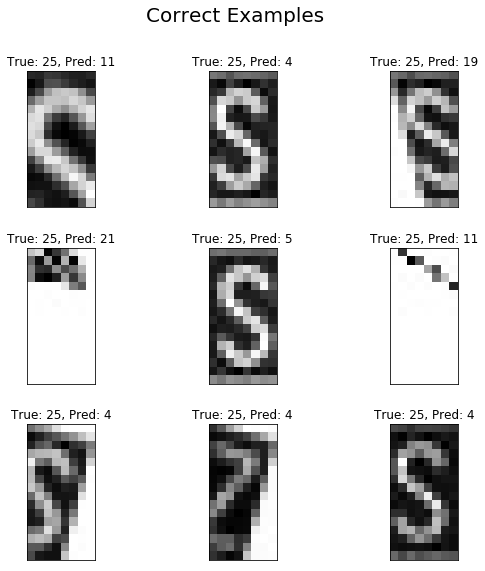

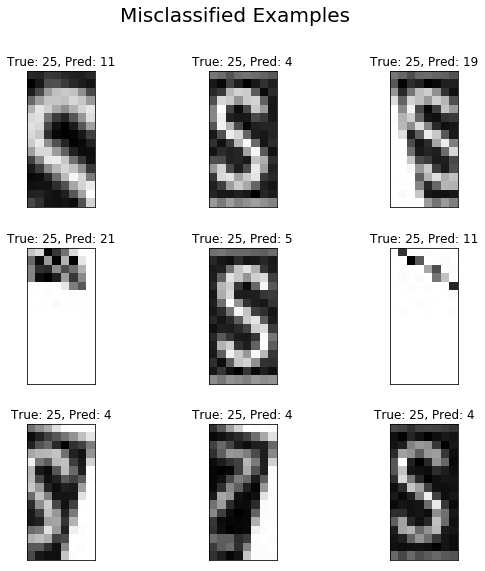

In [25]:
# Test the network after training
# Accuracy
import matplotlib.pyplot as plt
feed_dict_test = {x: test_flat_images, y: testLabels}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

# Plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(testLabels, axis=1)
plot_images(test_flat_images, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(test_flat_images, cls_true, cls_pred, title='Misclassified Examples')

In [26]:
# close the session after you are done with testing
#sess.close()